<a href="https://colab.research.google.com/github/Keita062/work/blob/main/(10.25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
data1 = pd.read_csv("eng.1.csv")
data2 = pd.read_csv("eng.2.csv")
data3 = pd.read_csv("eng.3.csv")
data4 = pd.read_csv("eng.4.csv")
data5 = pd.read_csv("eng.5.csv")

# 各データにカテゴリ列を追加する例
data1['League'] = 'Premier League'
data2['League'] = 'Championship'
data3['League'] = 'League One'
data4['League'] = 'League Two'
data5['League'] = 'National League'

# 結合(さまざまなデータを)
data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True)

data['FT'] = data['FT'].str.replace('–', '-', regex=False)

# 'FT' 列に欠損値がない行だけ分割し、Team1scoreとTeam2scoreに格納
data[['Team1score', 'Team2score']] = data['FT'].dropna().str.split('-', expand=True)

# スコア列を float 型に変換（欠損値のまま扱うため）
data['Team1score'] = pd.to_numeric(data['Team1score'], errors='coerce')
data['Team2score'] = pd.to_numeric(data['Team2score'], errors='coerce')

data

,Round,Date,Team 1,FT,Team 2,League,Team1score,Team2score
0,1,Sat Sep 12 2020,Fulham,0-3,Arsenal,Premier League,0.0,3.0
1,1,Sat Sep 12 2020,Crystal Palace,1-0,Southampton,Premier League,1.0,0.0
2,1,Sat Sep 12 2020,Liverpool,4-3,Leeds United,Premier League,4.0,3.0
3,1,Sat Sep 12 2020,West Ham,0-2,Newcastle Utd,Premier League,0.0,2.0
4,1,Sun Sep 13 2020,West Brom,0-3,Leicester City,Premier League,0.0,3.0
...,...,...,...,...,...,...,...,...
2537,46,Sat May 29 2021,FC Halifax Town,NaN,Chesterfield FC,National League,NaN,NaN
2538,46,Sat May 29 2021,Hartlepool United FC,NaN,Dover Athletic FC,National League,NaN,NaN
2539,46,Sat May 29 2021,King's Lynn FC,NaN,Aldershot Town FC,National League,NaN,NaN
2540,46,Sat May 29 2021,Solihull Moors FC,NaN,Eastleigh FC,National League,NaN,NaN


In [11]:
data.columns

Index(['Round', 'Date', 'Team 1', 'FT', 'Team 2', 'League', 'Team1score',
       'Team2score'],
      dtype='object')

In [14]:
# 1. チームごとの勝敗・得失点などのデータを初期化する
teams_stats = []

# 2. 各試合の結果をもとに、勝敗や得点を集計
for _, row in data.iterrows():
    team1, team2 = row['Team 1'], row['Team 2']
    score1, score2 = row['Team1score'], row['Team2score']
    league = row['League']

    # 勝敗の判定
    if score1 > score2:
        result1, result2 = 'win', 'loss'
    elif score1 < score2:
        result1, result2 = 'loss', 'win'
    else:
        result1, result2 = 'draw', 'draw'

    # 各チームの試合結果をリストに格納
    teams_stats.extend([
        {'League': league, 'Team': team1, 'Result': result1, 'GoalsScored': score1, 'GoalsConceded': score2},
        {'League': league, 'Team': team2, 'Result': result2, 'GoalsScored': score2, 'GoalsConceded': score1}
    ])

# 3. DataFrameに変換
df_stats = pd.DataFrame(teams_stats)

# 4. 集計処理
summary = df_stats.groupby(['League', 'Team']).agg(
    Matches=('Result', 'count'),
    Wins=('Result', lambda x: (x == 'win').sum()),
    Draws=('Result', lambda x: (x == 'draw').sum()),
    Losses=('Result', lambda x: (x == 'loss').sum()),
    GoalsScored=('GoalsScored', 'sum'),
    GoalsConceded=('GoalsConceded', 'sum')
).reset_index()

# 5. 得失点差と勝点を計算
summary['GoalDifference'] = summary['GoalsScored'] - summary['GoalsConceded']
summary['Points'] = summary['Wins'] * 3 + summary['Draws']

# 6. リーグごとにデータフレームを作成
league_dataframes = {}  # 各リーグのデータフレームを格納する辞書

for league_name in summary['League'].unique():
    league_df = summary[summary['League'] == league_name].reset_index(drop=True)
    league_dataframes[league_name] = league_df  # 辞書に格納

# 7. 各リーグのデータフレームを表示
for league_name, df in league_dataframes.items():
    print(f"--- {league_name} ---")
    print(df)
    print()

--- Championship ---
          League                    Team  Matches  Wins  Draws  Losses  \
0   Championship         AFC Bournemouth       46     5     40       1   
1   Championship             Barnsley FC       46     3     39       4   
2   Championship      Birmingham City FC       46     3     39       4   
3   Championship     Blackburn Rovers FC       46     4     37       5   
4   Championship            Brentford FC       46     4     39       3   
5   Championship         Bristol City FC       46     6     37       3   
6   Championship         Cardiff City FC       46     3     39       4   
7   Championship        Coventry City FC       46     2     37       7   
8   Championship         Derby County FC       46     1     38       7   
9   Championship   Huddersfield Town AFC       46     4     37       5   
10  Championship           Luton Town FC       46     5     37       4   
11  Championship        Middlesbrough FC       46     4     41       1   
12  Championship 

In [15]:
# プレミアリーグ（Premier League）のみのデータフレームを表示
premier_league_data = league_dataframes.get('Premier League')
Nationa_league_data = league_dataframes.get('National League')
league_one_data = league_dataframes.get('League One')
league_two_data = league_dataframes.get('League Two')
Championship_data = league_dataframes.get('Championship')

In [18]:
premier_league_data_sort = premier_league_data.sort_values(by='Points', ascending=False)
Nationa_league_data_sort = Nationa_league_data.sort_values(by='Points', ascending=False)
league_one_data_sort = league_one_data.sort_values(by='Points', ascending=False)
league_two_data_sort = league_two_data.sort_values(by='Points', ascending=False)
Championship_data_sort = Championship_data.sort_values(by='Points', ascending=False)

In [19]:
premier_league_data_sort

,League,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDifference,Points
11,Premier League,Manchester City,38,27,5,6,83.0,32.0,51.0,86
12,Premier League,Manchester Utd,38,21,11,6,73.0,44.0,29.0,74
10,Premier League,Liverpool,38,20,9,9,68.0,42.0,26.0,69
4,Premier League,Chelsea,38,19,10,9,58.0,36.0,22.0,67
9,Premier League,Leicester City,38,20,6,12,68.0,50.0,18.0,66
18,Premier League,West Ham,38,19,8,11,62.0,47.0,15.0,65
16,Premier League,Tottenham,38,18,8,12,68.0,45.0,23.0,62
0,Premier League,Arsenal,38,18,7,13,55.0,39.0,16.0,61
8,Premier League,Leeds United,38,18,5,15,62.0,54.0,8.0,59
6,Premier League,Everton,38,17,8,13,47.0,48.0,-1.0,59


In [20]:
Nationa_league_data_sort

,League,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDifference,Points
17,National League,Torquay United FC,44,6,37,1,18.0,6.0,12.0,55
16,National League,Sutton United FC,44,5,38,1,13.0,4.0,9.0,53
18,National League,Wealdstone FC,44,5,37,2,16.0,15.0,1.0,52
12,National League,Maidenhead United FC,44,5,36,3,13.0,15.0,-2.0,51
15,National League,Stockport County FC,44,4,38,2,13.0,7.0,6.0,50
14,National League,Solihull Moors FC,44,4,38,2,11.0,5.0,6.0,50
10,National League,Hartlepool United FC,44,3,40,1,9.0,8.0,1.0,49
8,National League,Eastleigh FC,44,3,40,1,14.0,9.0,5.0,49
4,National League,Bromley FC,44,3,39,2,12.0,8.0,4.0,48
13,National League,Notts County FC,44,3,38,3,10.0,8.0,2.0,47


In [21]:
data1['FT'] = data1['FT'].str.replace('–', '-', regex=False)

# 'FT' 列に欠損値がない行だけ分割し、Team1scoreとTeam2scoreに格納
data1[['Team1score', 'Team2score']] = data1['FT'].dropna().str.split('-', expand=True)

# スコア列を float 型に変換（欠損値のまま扱うため）
data1['Team1score'] = pd.to_numeric(data1['Team1score'], errors='coerce')
data1['Team2score'] = pd.to_numeric(data1['Team2score'], errors='coerce')

data1

,Round,Date,Team 1,FT,Team 2,League,Team1score,Team2score
0,1,Sat Sep 12 2020,Fulham,0-3,Arsenal,Premier League,0,3
1,1,Sat Sep 12 2020,Crystal Palace,1-0,Southampton,Premier League,1,0
2,1,Sat Sep 12 2020,Liverpool,4-3,Leeds United,Premier League,4,3
3,1,Sat Sep 12 2020,West Ham,0-2,Newcastle Utd,Premier League,0,2
4,1,Sun Sep 13 2020,West Brom,0-3,Leicester City,Premier League,0,3
...,...,...,...,...,...,...,...,...
375,38,Sun May 23 2021,West Ham,3-0,Southampton,Premier League,3,0
376,38,Sun May 23 2021,Leeds United,3-1,West Brom,Premier League,3,1
377,38,Sun May 23 2021,Arsenal,2-0,Brighton,Premier League,2,0
378,38,Sun May 23 2021,Liverpool,2-0,Crystal Palace,Premier League,2,0


<ipython-input-25-d3ad3d24cf57>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', 20)


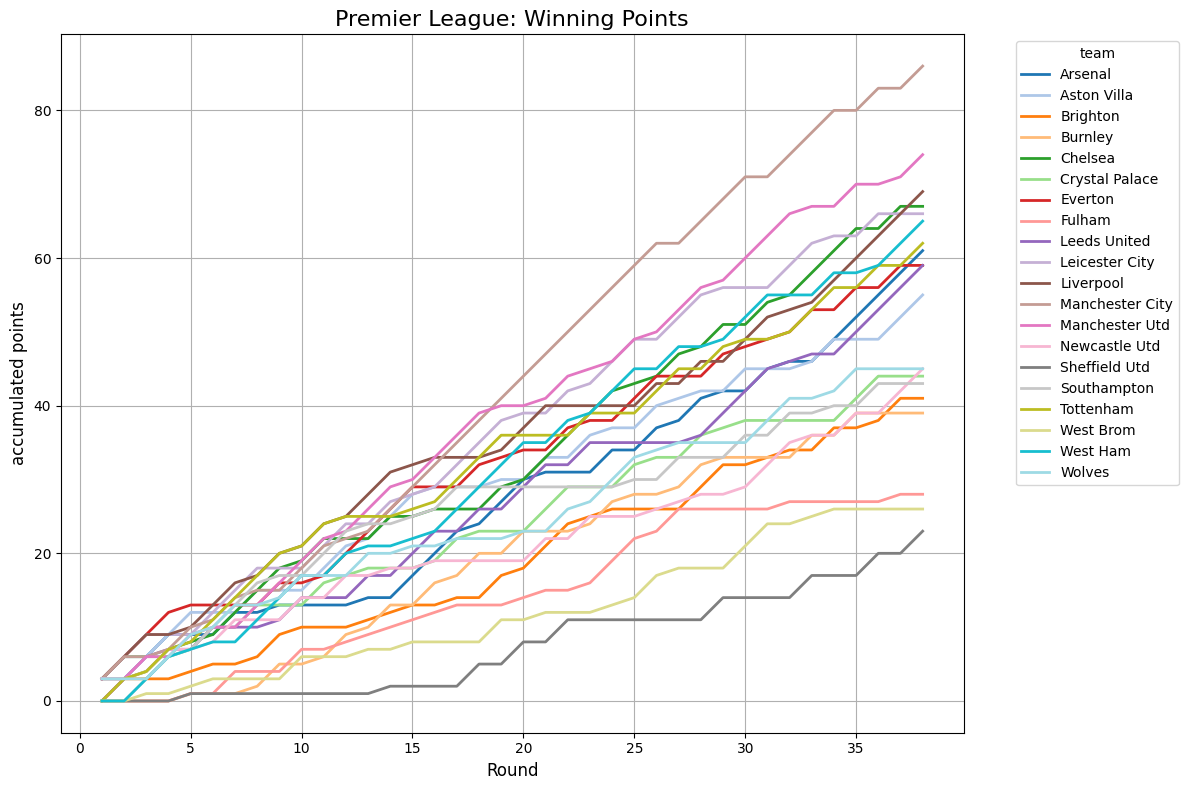

In [25]:
if data1 is not None:
    # プレミアリーグの試合データから個々の試合の詳細を取得
    premier_league_matches = data1[data1['League'] == 'Premier League']

    # 各チームの試合ごとの勝ち点を計算
    match_points = []

    match_points = []

    for _, row in premier_league_matches.iterrows():
        team1, team2 = row['Team 1'], row['Team 2']
        score1, score2 = row['Team1score'], row['Team2score']

        if score1 > score2:  # チーム1が勝利
            points1, points2 = 3, 0
        elif score1 < score2:  # チーム2が勝利
            points1, points2 = 0, 3
        else:  # 引き分け
            points1, points2 = 1, 1

        # チームごとに試合結果をリストに追加
        match_points.extend([
            {'Team': team1, 'Round': row['Round'], 'Points': points1},
            {'Team': team2, 'Round': row['Round'], 'Points': points2}
        ])

    # 勝ち点のDataFrameを作成し、Roundごとにソート
    points_df = pd.DataFrame(match_points).sort_values(['Team', 'Round'])

    # 各チームのラウンドごとの累積勝ち点を計算
    points_df['CumulativePoints'] = points_df.groupby('Team')['Points'].cumsum()

    # カラーマップから20色を取得（'tab20'は20色のカラーマップ）
    cmap = plt.cm.get_cmap('tab20', 20)

    # グラフの描画
    plt.figure(figsize=(12, 8))

    # チームごとに折れ線グラフを描く
    for i, (team, team_data) in enumerate(points_df.groupby('Team')):
        plt.plot(
            team_data['Round'], team_data['CumulativePoints'],
            label=team, color=cmap(i), linewidth=2
        )

    # グラフの設定
    plt.title('Premier League: Winning Points', fontsize=16)
    plt.xlabel('Round', fontsize=12)
    plt.ylabel('accumulated points', fontsize=12)
    plt.legend(title='team', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(True)
    plt.tight_layout()

    # グラフを表示
    plt.show()
else:
    print("Premier Leagueのデータが見つかりません。")